# Explore here

In [36]:
import pandas as pd
# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np



- Clasificador de Vinos con KNN
Entrena un modelo de K-Vecinos más Cercanos (KNN) para predecir la calidad de un vino tinto a partir de sus características químicas. ¿Podría una IA ayudarte a elegir un vino digno de sommelier?

# Paso 1 

Descripción de las columnas
Cada fila representa un vino. Las columnas describen su composición química:

fixed acidity, volatile acidity, citric acid

residual sugar, chlorides

free sulfur dioxide, total sulfur dioxide

density, pH, sulphates, alcohol

La columna objetivo es label:

0 = Baja calidad

1 = Calidad media

2 = Alta calidad


In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv",sep=";" )
df.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
X = df.drop("quality", axis = 1)
y = df["quality"]

def recodificar_calidad(calidad):
    if calidad <= 4:
        return 0  
    elif calidad <= 6:
        return 1  
    else:
        return 2  


y = y.apply(recodificar_calidad)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Escalado 

In [40]:

columnas_X = X_train.columns
 
scaler = StandardScaler()
scaler.fit(X_train)

X_escalado_xtrain = scaler.transform(X_train)
X_panda_escalado_entreno = pd.DataFrame(X_escalado_xtrain, index = X_train.index, columns = columnas_X)

X_escalado_x_value = scaler.transform(X_test)
X_value_escalado_entreno = pd.DataFrame(X_escalado_x_value, index = X_test.index, columns = columnas_X)

X_panda_escalado_entreno.head(2)




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
354,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272


# Entrenamiento de K-Vecinos


- Iniciar el  modelo
- Predicción 
- Matriz de Confusión 

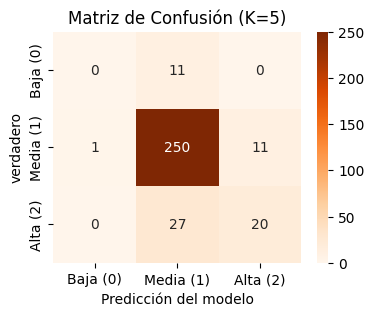

In [ ]:
knn_base = KNeighborsClassifier(n_neighbors=5)
knn_base.fit(X_panda_escalado_entreno, y_train)

y_predicion_base = knn_base.predict(X_value_escalado_entreno)

cm = confusion_matrix(y_test, y_predicion_base)
plt.figure(figsize=(4, 3))

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Baja (0)', 'Media (1)', 'Alta (2)'],
            yticklabels=['Baja (0)', 'Media (1)', 'Alta (2)'])

plt.title('Matriz de Confusión (K=5)')
plt.ylabel('verdadero')
plt.xlabel('Predicción del modelo')
plt.show()

# Optimización de K

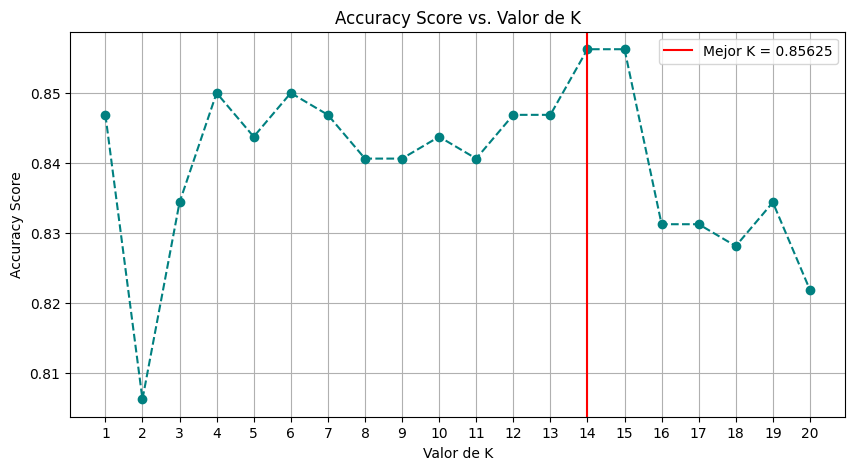

In [45]:
k_range = range(1, 21)
resultados_K = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_panda_escalado_entreno, y_train)
    
    
    y_pred = knn.predict(X_value_escalado_entreno)
    resultados_K.append(accuracy_score(y_test, y_pred))


mejor_k = k_range[np.argmax(resultados_K)]
mejor_accuracy = np.max(resultados_K)




plt.figure(figsize=(10, 5))
plt.plot(k_range, resultados_K, marker='o', linestyle='--', color='teal')
plt.title('Accuracy Score vs. Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy Score')
plt.xticks(k_range)
plt.grid(True)
plt.axvline(mejor_k, color='red', linestyle='-', label=f'Mejor K = {mejor_accuracy}')
plt.legend()
plt.show()

- NOta: He utilizado un for en el rango indicado para poder conseguir el mejor K y ese resultado se guarda en la varible: 

# Conclusión: 

- Que una maquina pueda hacer esto me parece increible :  Después de probar varias veces, vimos que el valor perfecto para el modelo KNN era K=14. 
Con este ajuste, nuestra máquina clasifica los vinos con una precisión de casi del 86%. 

- Tambien me ayudo a que se escalaron correctamente los datos para que pudiera medir las distancias sin trampas y clasificar el vino correctamente.
